In [1]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import functions notebook and load data set here
import sys
sys.path.append("../")
from Modeling_functions import *

In [3]:
df=pd.read_csv('../data/Season_2021.csv')

In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
n = 50
df=df.head(int(len(df)*(n/100)))

In [6]:
n = 50
df2=df.tail(int(len(df)*(n/100)))

Find and eliminate NaNs

In [7]:
df=df.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
          'H_Opp_win_probability_subtracted'],axis=1)

In [8]:
df2=df2.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
          'H_Opp_win_probability_subtracted'],axis=1)

In [9]:
df.home_win.value_counts(normalize=True)

1    0.532632
0    0.467368
Name: home_win, dtype: float64

In [10]:
df2.home_win.value_counts(normalize=True)

1    0.556962
0    0.443038
Name: home_win, dtype: float64

In [11]:
#df2.drop_duplicates(inplace=True)
df2

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
238,SDP,33.234568,4.500000,8.055556,4.290123,4.197099,3.617284,8.172840,37.771605,0.236994,...,10.759259,14.820988,6.253086,0.0,52.981481,1.440252,0.465409,0.061136,0.719753,0
239,MIN,33.524691,4.500000,8.092593,4.259259,4.234630,3.240741,8.672840,37.518519,0.234944,...,11.481481,14.981481,6.432099,0.0,53.228395,1.286624,0.426752,0.103080,0.840123,0
240,COL,33.378882,4.590062,8.310559,4.403727,4.464969,3.049689,8.422360,37.310559,0.243193,...,11.796296,13.481481,5.895062,0.0,49.740741,1.518519,0.512346,-0.048346,-0.406173,1
241,MIA,33.012346,3.845679,7.679012,3.666667,3.608457,2.777778,9.586420,36.598765,0.227160,...,11.246914,15.907407,6.586420,0.0,51.919753,1.419753,0.462963,0.063648,0.404321,1
242,SEA,33.055556,4.302469,7.462963,4.154321,4.023580,3.302469,9.209877,37.098765,0.220506,...,10.987654,16.092593,6.641975,0.0,52.654321,1.298137,0.341615,0.079883,0.638889,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,NYM,32.160494,3.925926,7.666667,3.728395,3.801975,3.055556,8.592593,36.148148,0.232673,...,10.728395,13.561728,5.537037,0.0,52.450617,1.506250,0.600000,0.026123,-0.048765,1
471,TBR,33.993827,5.290123,8.240741,5.000000,4.965988,3.611111,9.518519,38.351852,0.237370,...,10.987654,16.092593,6.641975,0.0,52.654321,1.298137,0.341615,0.079883,0.638889,1
472,OAK,33.302469,4.586420,7.919753,4.308642,4.405494,3.364198,8.327160,37.679012,0.233253,...,10.993827,14.493827,6.333333,0.0,51.037037,1.186335,0.335404,0.024944,0.452469,1
473,LAD,33.611111,5.123457,8.209877,4.932099,5.025000,3.783951,8.691358,38.512346,0.237907,...,11.481481,14.981481,6.432099,0.0,53.228395,1.286624,0.426752,0.103080,0.840123,1


In [12]:
df.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
0,DET,33.185185,4.302469,8.018519,4.166667,4.138210,3.024691,9.345679,36.907407,0.236500,...,10.685185,13.962963,5.969136,0.0,51.117284,1.238994,0.408805,0.030623,0.200617,1
1,MIA,33.012346,3.845679,7.679012,3.666667,3.608457,2.777778,9.586420,36.598765,0.227160,...,10.561728,14.308642,5.956790,0.0,51.925926,1.604938,0.648148,-0.048728,-0.748765,0
2,CIN,33.475309,4.851852,8.345679,4.666667,4.652346,3.413580,8.796296,38.037037,0.244253,...,11.500000,13.981481,6.098765,0.0,51.407407,1.106918,0.358491,-0.005957,-0.004321,0
3,CHC,32.753086,4.351852,7.746914,4.148148,4.157099,3.098765,9.851852,36.864198,0.231142,...,10.759259,14.820988,6.253086,0.0,52.981481,1.440252,0.465409,0.061136,0.719753,0
4,NYY,32.907407,4.388889,7.814815,4.111111,4.253951,3.833333,9.148148,37.407407,0.232630,...,10.456790,13.604938,5.611111,0.0,46.413580,1.304348,0.503106,-0.023549,-0.626543,0


In [13]:
df2.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
238,SDP,33.234568,4.500000,8.055556,4.290123,4.197099,3.617284,8.172840,37.771605,0.236994,...,10.759259,14.820988,6.253086,0.0,52.981481,1.440252,0.465409,0.061136,0.719753,0
239,MIN,33.524691,4.500000,8.092593,4.259259,4.234630,3.240741,8.672840,37.518519,0.234944,...,11.481481,14.981481,6.432099,0.0,53.228395,1.286624,0.426752,0.103080,0.840123,0
240,COL,33.378882,4.590062,8.310559,4.403727,4.464969,3.049689,8.422360,37.310559,0.243193,...,11.796296,13.481481,5.895062,0.0,49.740741,1.518519,0.512346,-0.048346,-0.406173,1
241,MIA,33.012346,3.845679,7.679012,3.666667,3.608457,2.777778,9.586420,36.598765,0.227160,...,11.246914,15.907407,6.586420,0.0,51.919753,1.419753,0.462963,0.063648,0.404321,1
242,SEA,33.055556,4.302469,7.462963,4.154321,4.023580,3.302469,9.209877,37.098765,0.220506,...,10.987654,16.092593,6.641975,0.0,52.654321,1.298137,0.341615,0.079883,0.638889,1


In [14]:
def data_preprocessing(df, df2):
    X_train = df.drop(['home_win','H_name','A_name'], axis=1)
    X_test = df2.drop(['home_win','H_name','A_name'], axis=1)
    y_train = df.home_win
    y_test= df2.home_win
    
    ss = StandardScaler()
    X_train_scaled = ss.fit_transform(X_train)
    X_test_scaled = ss.transform(X_test)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled,y_train,y_test

In [15]:
X_train_scaled,X_test_scaled,y_train,y_test=data_preprocessing(df,df2)

In [16]:
# X_test_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
#                     'H_Opp_inherited_runners'],axis=1,inplace=True)

In [17]:
# X_train_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
#                     'H_Opp_inherited_runners'],axis=1,inplace=True)

## Feature Selection

In [18]:
def new_acc(probabilities):
    class_list2=[]
    for log in probabilities:
        if log[0]<.40:
            class_list2.append(1)
        elif log[0]>.60:
            class_list2.append(0)
        else:
            class_list2.append(3)
    y_pred_class=pd.DataFrame(class_list2)
    y_pred_class.reset_index(inplace=True)
    y_test_df=pd.DataFrame(y_test)
    y_test_df.reset_index(inplace=True)
    comb=pd.concat([y_test_df,y_pred_class],axis=1)
    comb.drop(['index','index'],axis=1,inplace=True)
    comb['pred']=comb[0]
    comb.drop([0],axis=1,inplace=True)
    comb.drop(comb[comb['pred'] == 3].index, inplace = True)
    count=0
    for bools in comb['home_win']==comb['pred']:
        if bools is True:
            count+=1
        else:
            pass
    accuracy=count/len(comb)
    
    return accuracy,count

### RFECV

In [19]:
rfeats= feature_select(X_train_scaled,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = X_train_scaled[rfeats]
X_test_best_for = X_test_scaled[rfeats]

Number of Trees: 125
criterion: gini
Mean Cross-Val Score: 0.4442105263157895
Train Mean Accuracy: 0.5789473684210527
Test Mean Accuracy: 0.5949367088607594
Recall Score: 0.7196969696969697
Precision Score: 0.6168831168831169
F1 score: 0.6643356643356643


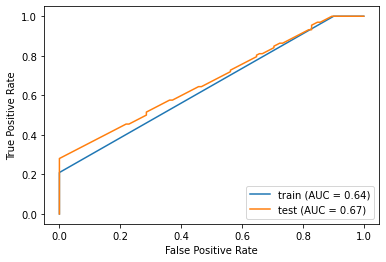

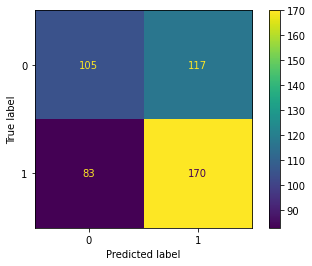

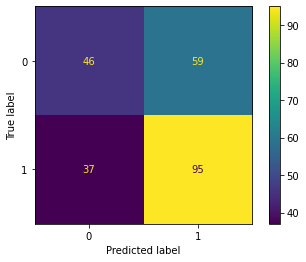

In [20]:
predictions,probabilities=random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

In [21]:
new_acc(probabilities)

(0.9444444444444444, 51)

### PCA

In [22]:
pca=PCA(n_components=0.9)
train_pca=pca.fit_transform(X_train_scaled)
test_pca=pca.transform(X_test_scaled)

Number of Trees: 500
criterion: gini
Mean Cross-Val Score: 0.43578947368421056
Train Mean Accuracy: 0.5789473684210527
Test Mean Accuracy: 0.6075949367088608
Recall Score: 0.7651515151515151
Precision Score: 0.6196319018404908
F1 score: 0.6847457627118644


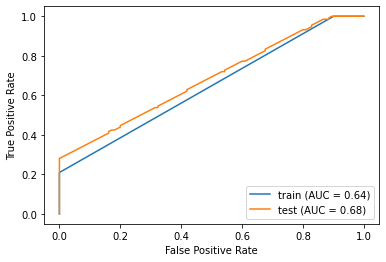

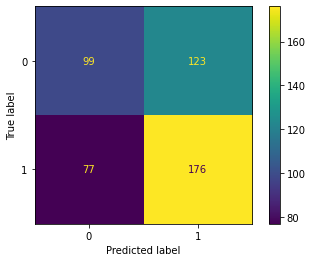

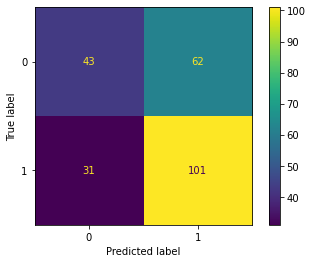

In [23]:
predictions,probabilities=random_forest(train_pca,test_pca,y_train,y_test)

In [24]:
new_acc(probabilities)

(1.0, 48)